<a href="https://colab.research.google.com/github/ShaoFuLiu/tSDRG_DataAnalysis/blob/master/%E3%80%8CTestSortingData_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **tSDRG Data Analysis**

## Import lib

In [ ]:
import os
import math
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit

## A .Plot Bulk Correlation for OBC/PBC ##


### 1 .Average raw data

In [ ]:
# Bulk Correlation for OBC/PBC 
### average raw data 

BC = 'OBC'
Ls = [32, 48, 64, 96, 128, 256]
Jdis = ['Jdis10']
N = 200  
init_seed = 1

for j in range(len(Jdis)):
    delta = Jdis[j]

    for i in range(len(Ls)):
        L = Ls[i]
        arr = []  #arr = ['1','2','3','4','5'...]

        for i in range(N):
            n = str(init_seed+i)
            arr.append(n)

        for i in range(len(arr)):
            num = arr[i] 
            myfile = '/home/liusf/tSDRG/Main/data/'+ BC +'/'+ delta +'/L'+ str(L) +'_P10_m30_'+ num + '/L'+ str(L) +'_P10_m30_'+ num +'_corr1.csv'
            df = pd.read_csv(myfile)  
            dfr = df['x2'] - df['x1']
            DataColle = {'x2-x1': dfr}
            dfR = pd.DataFrame(DataColle, columns=['x2-x1'])
            dfc = df['corr']
            
            if(i == 0):
                dftc = df['corr']

            if(i != 0):
                dftc += dfc

        for j in range(len(dftc)):
                dftc[j] = pow(-1,dfr[j])*dftc[j]  

        dfavc = dftc/N
        dfavc = pd.concat([dfR,dfavc],axis=1)

        direc = '/home/liusf/test/'+ delta
        path = direc +'/'+ BC +'_L'+ str(L) +'_P10_m30_corr1_N'+ str(N) +'.csv'
        if (os.path.exists(direc) == False):
            os.mkdir(direc)
        dfavc.to_csv(path,index=0)

### 2 .Fitting plot (OBC)


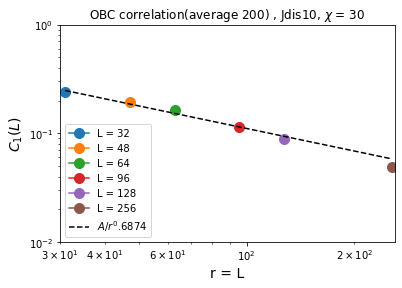

In [ ]:
## OBC plot 
### fitting plot 

BC = 'OBC'
Ls = [32, 48, 64, 96, 128, 256]
Jdis = 'Jdis10'
N = 200  #arr = ['1','2','3','4','5'...]
init_seed = 1
dftail = pd.DataFrame(columns = ['x2-x1', 'corr'])

def func(x, a, b): ## 定義 fitting 公式 (ax^b)
    return a*x**b

for i in range(len(Ls)):
    #dfM = pd.DataFrame(columns = ['x2-x1', 'corr'])
    myfile = '/home/liusf/test/'+ Jdis +'/'+ BC +'_L'+ str(Ls[i]) +'_P10_m30_corr1_N'+ str(N) +'.csv'
    df = pd.read_csv(myfile)
    plt.plot(df['x2-x1'] ,df['corr'],"o-", markersize = 10, label = 'L = %d' %(Ls[i])) ## 原始data點
    tail = {'x2-x1':df['x2-x1'][0] ,'corr': df['corr'][0]} ## 取最後一個值
    dftail.loc[i] = tail

popt1, pcov1 = curve_fit(func, dftail['x2-x1'], dftail['corr']) ## fitting 最後一個值 curve
c = popt1[0]
d = popt1[1]
yp = []
for i in range(len(Ls)):
    yp.append(func(dftail['x2-x1'][i], c ,d))
plt.plot(dftail['x2-x1'], yp, "k--", label = '$A/r^%1.4f$' %(abs(d))) ## fitting data curve

plt.xlabel('r = L', fontsize=14)
plt.ylabel(r'$C_1(L)$', fontsize=14)
plt.xlim(30,260)
plt.ylim(0.01, 1)
plt.xscale('log')
plt.yscale('log')
plt.title(r'OBC correlation(average %d) , %s, $\chi$ = 30' % (int(N), Jdis), fontsize=12)
plt.legend(loc = 'best')
plt.savefig( BC +'_Corr_P10_' + Jdis + '_m30_N' + str(N) +'.pdf', format='pdf', dpi=4000)
plt.show()

### 3 .Fitting plot (PBC)




#### Average meta data

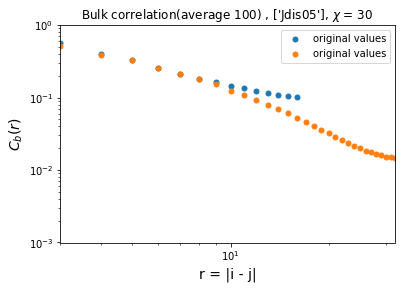

In [ ]:
### PBC plot 
#### average meta data 

BC = 'PBC'
Ls = [32, 64]
Jdis = 'Jdis10'
N = 100

for i in range(len(Ls)):
    dfM = pd.DataFrame(columns = ['x2-x1', 'corr'])
    direc = '/home/liusf/test/'+ Jdis
    path = direc +'/'+ BC +'_L'+ str(Ls[i]) +'_P10_m30_corr1_N'+ str(N) + '_final' +'.csv'
    
    L = int(Ls[i]/2)
    myfile = '/home/liusf/test/'+ Jdis +'/'+ BC +'_L'+ str(Ls[i]) +'_P10_m30_corr1_N'+ str(N) +'.csv'
    df = pd.read_csv(myfile)
    
    if (os.path.exists(direc) == False):
        os.mkdir(direc)
    
    for i in range(L):
        r = i+1
        dfsr = df.loc[df['x2-x1'] == r]
        mean = {'x2-x1':r ,'corr': dfsr['corr'].mean()}
        dfM.loc[i] = mean
    
    plt.plot(dfM['x2-x1'] ,dfM['corr'],".", markersize = 10, label = 'original values')
    dfM.to_csv(path,index=0)

plt.xlabel('r = |i - j|', fontsize=14)
plt.ylabel(r'$C_b(r)$', fontsize=14)
plt.xlim(3,32)
plt.ylim(0.001, 1)
plt.xscale('log')
plt.yscale('log')
plt.title(r'Bulk correlation(average %d) , %s, $\chi$ = 30' % (int(N), Jdis), fontsize=12)
plt.legend(loc = 'best')
#plt.savefig( BC +'_L32_P10_' + Jdis + '_m30_N' + str(N) +'.pdf', format='pdf', dpi=4000)
plt.show()

#### Plot fitting result with two fitting method

-0.8161473400947776
-0.9789045929700292


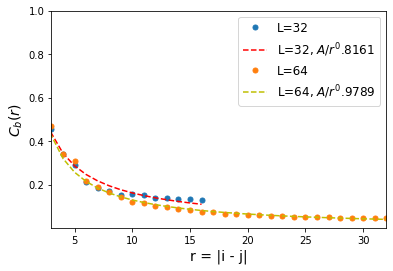

In [ ]:
#### fitting method 1 

BC = 'PBC'
Ls = [32, 64]
Jdis = ['Jdis10']
N = 100

for i in range(len(Ls)):
    L = int(Ls[i]/2)
    dfln = pd.DataFrame(columns = ['ln(x2-x1)', 'ln(corr)'])
    direc = '/home/liusf/test/'+ Jdis[0]
    path = direc +'/'+ BC +'_L'+ str(Ls[i]) +'_P10_m30_corr1_N'+ str(N) + '_final' +'.csv'
    df = pd.read_csv(path)
    plt.plot(df['x2-x1'], df['corr'], ".", markersize = 10, label = 'L=%d' %(Ls[i])) ## oringinal data curve
    
    for i in range(L):
        r = i+1
        ln = {'ln(x2-x1)':math.log(r) ,'ln(corr)':math.log(df['corr'][i])}
        dfln.loc[i] = ln
    a1 = np.polyfit(dfln['ln(x2-x1)'], dfln['ln(corr)'], 1)
    print(a1[0])
    yp = []
    for i in range(L):
        yp.append(df['x2-x1'][i]**a1[0]*math.exp(a1[1]))
    #print(len(yp))
    if(L == 16):
        plt.plot(df['x2-x1'], yp, "r--", label = 'L=32, $A/r^%1.4f$' %(abs(a1[0]))) ## fitting data curve
    else:
        plt.plot(df['x2-x1'], yp, "y--", label = 'L=64, $A/r^%1.4f$' %(abs(a1[0]))) ## fitting data curve
    
plt.xlabel('r = |i - j|', fontsize=14)
plt.ylabel(r'$C_b(r)$', fontsize=14)
plt.xlim(3,32)
plt.ylim(0.001, 1)
#plt.xscale('log')
#plt.yscale('log')
plt.legend(loc = 'best',fontsize=12)
#plt.savefig( '/home/liusf/test/'+ 'Fitting1_' + BC +'_P10'+ Jdis[0] +'_m30_N' + str(N) +'.pdf', format='pdf', dpi=4000)
plt.show()

x2-x1      corr
0   16.0  0.130076
[ 1.22221923 -0.91271243]
   x2-x1      corr
0   16.0  0.130076
1   32.0  0.048948
[ 1.23118223 -0.96164868]


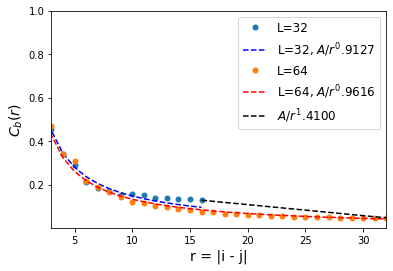

In [ ]:
#### fitting method 2 

BC = 'PBC'
Ls = [32, 64]
Jdis = ['Jdis10']
N = 100

def func(x, a, b): ## 定義 fitting 公式 (ax^b)
    return a*x**b

dftail = pd.DataFrame(columns = ['x2-x1', 'corr'])

for i in range(len(Ls)):
    L = int(Ls[i]/2)
    direc = '/home/liusf/test/'+ Jdis[0]
    path = direc +'/'+ BC +'_L'+ str(Ls[i]) +'_P10_m30_corr1_N'+ str(N) + '_final' +'.csv'
    df = pd.read_csv(path)
    
    tail = {'x2-x1':df['x2-x1'][L-1] ,'corr': df['corr'][L-1]} ## 取最後一個值
    dftail.loc[i] = tail
    print(dftail)
    
    plt.plot(df['x2-x1'], df['corr'], ".", markersize = 10, label = 'L=%d' %(Ls[i])) ## oringinal data curve   
    popt, pcov = curve_fit(func, df['x2-x1'], df['corr'])
    print(popt)
    a = popt[0]
    b = popt[1]
    yp = []
    for i in range(L):
        yp.append(func(df['x2-x1'][i], a ,b))
    
    if(L == 16):
        plt.plot(df['x2-x1'], yp, "b--", label = 'L=32, $A/r^%1.4f$' %(abs(b))) ## fitting data curve
    else:
        plt.plot(df['x2-x1'], yp, "r--", label = 'L=64, $A/r^%1.4f$' %(abs(b))) ## fitting data curve

popt1, pcov1 = curve_fit(func, dftail['x2-x1'], dftail['corr']) ## fitting 最後一個值 curve
c = popt1[0]
d = popt1[1]
yp = []
for i in range(len(Ls)):
    yp.append(func(dftail['x2-x1'][i], c ,d))
plt.plot(dftail['x2-x1'], yp, "k--", label = '$A/r^%1.4f$' %(abs(d))) ## fitting data curve

plt.xlabel('r = |i - j|', fontsize=14)
plt.ylabel(r'$C_b(r)$', fontsize=14)
plt.xlim(3,32)
plt.ylim(0.001, 1)
#plt.xscale('log')
#plt.yscale('log')
plt.legend(loc = 'best',fontsize=12)
plt.show()

## B. String Order Parameter ##

### 1 .Average raw data

In [ ]:
## String Order Parameter 
### average raw data 

BC = 'PBC'
Ls = [32, 64, 128, 256]
Jdis = ['Jdis08', 'Jdis09', 'Jdis10', 'Jdis11']
N = 100  

for j in range(len(Jdis)):
    delta = Jdis[j]

    for i in range(len(Ls)):
        L = Ls[i]
        arr = []  

        for i in range(N):
            n = str(87+i)
            arr.append(n)

        for i in range(len(arr)):
            num = arr[i] 
            myfile = '/home/liusf/tSDRG/Main/data/'+ BC +'/'+ delta +'/L'+ str(L) +'_P10_m30_'+ num + '/L'+ str(L) +'_P10_m30_'+ num +'_string.csv'
            df = pd.read_csv(myfile)  
            dfr = df['x2'] - df['x1']
            DataColle = {'x2-x1': dfr}
            dfR = pd.DataFrame(DataColle, columns=['x2-x1'])

            if(i == 0):
                dftc = df['corr']
            dfc = df['corr']

            if(i != 0):
                dftc += dfc

        dfavc = dftc/N
        dfavc = pd.concat([dfR,dfavc],axis=1)

        direc = '/home/liusf/test/'+ delta
        path = direc +'/'+ BC +'_L'+ str(L) +'_P10_m30_string_N'+ str(N) +'.csv'
        if (os.path.exists(direc) == False):
            os.mkdir(direc)
        dfavc.to_csv(path,index=0)

### 2 .Plot ln(L) vs ln(O^z)

In [1]:
### plot it 
BC = 'PBC'
Ls = [32, 64, 128, 256]
Jdis = ['Jdis08', 'Jdis09', 'Jdis10', 'Jdis11']
N = 100

for j in range(len(Jdis)):
    delta = Jdis[j]
    dfstr = pd.DataFrame(columns = ['ln(L)', 'ln(O^z)'])
    
    for i in range(len(Ls)):
        myfile = '/home/liusf/test/'+ delta +'/'+ BC +'_L'+ str(Ls[i]) +'_P10_m30_string_N'+ str(N) +'.csv'
        df = pd.read_csv(myfile)
        mean = {'ln(L)':math.log(Ls[i]) ,'ln(O^z)': math.log(df['corr'].mean())}
        dfstr.loc[i] = mean

    plt.plot(dfstr['ln(L)'] ,dfstr['ln(O^z)'], "o-", markersize = 8, label = delta)
    #plt.plot(dfstr['ln(L)'] ,dfstr['ln(O^z)'])
plt.xlabel(r'$lnL$', fontsize=14)
plt.ylabel(r'$lnO^z(L/2)$', fontsize=14)
plt.xlim(3.3,5.7)
plt.ylim(-4.6, -1.4)
#plt.xscale('log')
#plt.yscale('log')
plt.title(r'String order parameter(average %d), $\chi$ = 30, delta = 0.8 to 1.2' % (int(N)), fontsize=12)
plt.legend(loc = 'best')
plt.savefig( '/home/liusf/test/'+ BC +'_P10_m30_string_N' + str(N) +'.pdf', format='pdf', dpi=4000)
plt.show()

NameError: ignored

### 3 .Plot delta vs O^z 

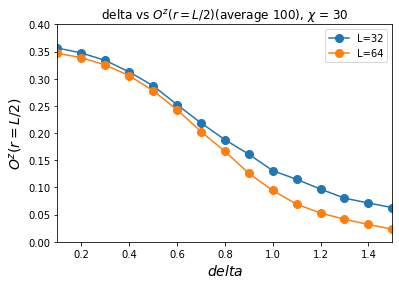

In [ ]:
### plot delta vs O^z 
BC = 'PBC'
Ls = [32, 64]
Jdis = ['Jdis01','Jdis02','Jdis03','Jdis04','Jdis05','Jdis06','Jdis07','Jdis08','Jdis09','Jdis10','Jdis11','Jdis12','Jdis13','Jdis14','Jdis15']
N = 100  

arr = []
for j in range(N):
    n = str(87+j)
    arr.append(n)

for i in range(len(Ls)):
    L = Ls[i]
    dfstr = pd.DataFrame(columns = ['delta', 'O^z'])
    
    for d in range(len(Jdis)):
        J = Jdis[d]
        delta = Jdis[d][4] + '.' + Jdis[d][5]
        D = float(delta)
        
        for k in range(len(arr)):
            num = arr[k] 
            myfile = '/home/liusf/tSDRG/Main/data/'+ BC +'/'+ J +'/L'+ str(L) +'_P10_m30_'+ num + '/L'+ str(L) +'_P10_m30_'+ num +'_string.csv'
            df = pd.read_csv(myfile)  
            if(k == 0):
                dftc = df['corr']
            dfc = df['corr']

            if(k != 0):
                dftc += dfc

        dfavc = dftc/N                          ## first average(N times)
        mean = {'delta':D ,'O^z':dfavc.mean()}  ## second average(L/2 times)
        dfstr.loc[d] = mean                     ## total average times = N * L/2

    plt.plot(dfstr['delta'] ,dfstr['O^z'],"o-", markersize = 8, label = 'L=%d' %(L))
    #plt.plot(dfstr['delta'] ,dfstr['O^z'], color = 'b')

plt.xlabel(r'$delta$', fontsize=14)
plt.ylabel(r'$O^z(r=L/2)$', fontsize=14)
plt.xlim(0.1,1.5)
plt.ylim(0, 0.4)
#plt.xscale('log')
#plt.yscale('log')
plt.title(r'delta vs $O^z(r=L/2)$(average %d), $\chi$ = 30' % (int(N)), fontsize=12)
plt.legend(loc = 'best',fontsize=12)
plt.savefig( BC + '_P10_m30_N' + str(N) +'_Oz-delta.pdf', format='pdf', dpi=4000)
plt.show()

## C. Distribution of End to end correlations 

### 1 .Raw data to meta data 

In [ ]:
## Distribution of End to end correlations 
### raw data to meta data 

BC = 'OBC'
#Ls = [32, 48, 64, 96, 128, 256]
Ls = [32]
Jdis = ['Jdis10']
N = 10000  #arr = ['1','2','3','4','5'...]
m = 30

for j in range(len(Jdis)):
    delta = Jdis[j]

    for i in range(len(Ls)):
        L = Ls[i]
        arr = []  

        for i in range(N):
            n = str(1+i)
            arr.append(n)

        for i in range(len(arr)):
            num = arr[i] 
            myfile = '/home/liusf/tSDRG/Main/data/'+ BC +'/'+ delta +'/L'+ str(L) +'_P10_m'+ str(m) +'_'+ num + '/L'+ str(L) +'_P10_m'+ str(m) +'_'+ num +'_corr1.csv'
            df2 = pd.read_csv(myfile)
            df2['corr'] = -df2['corr'].abs().apply(np.log)
            
            if (i == 0):
                df1 = pd.read_csv(myfile)
                df1['corr'] = -df1['corr'].abs().apply(np.log)
            else:
                df1 = pd.concat([df1,df2], ignore_index=True)
        
        direc = '/home/liusf/test/Distribution_end_to_end_correlation'
        path = direc + '/L' + str(L) + '_P10_m30_Jdis10_sum' + str(N) + '_corr1.csv'
        if (os.path.exists(direc) == False):
            os.mkdir(direc)
        df1.to_csv(path,index=0)

### 2 .Plot x vs lnP(x) (x = -ln(C_1(L)) )

921
3387
5341
6915
7977
8729
9199
9518
9718
9833
9913
9952
9977
9990
9994
9997


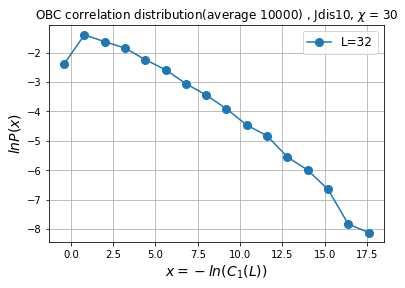

In [ ]:
## Distribution of End to end correlations 
### plot 

BC = 'OBC'
#Ls = [32, 48, 64, 96, 128, 256]
Ls = [32]
Jdis = 'Jdis10'
N = 10000

for i in range(len(Ls)):
    myfile = '/home/liusf/test/Distribution_end_to_end_correlation/L' + str(Ls[i]) + '_P10_m30_Jdis10_sum'+ str(N) +'_corr1.csv'
    df = pd.read_csv(myfile)

    up = -1
    down = 0.2
    n = 1.2
    b = 0
    df2 = pd.DataFrame(columns = ['mid', 'lnP'])

    for j in range(16):
        #print((left+right)/2)
        mid = (up+down)/2 
        selected = df[df['corr'].between(up,down)]['corr']
        up += n
        down += n
        a = len(selected)
        b += a
        print(b)
        lnP = math.log(len(selected)/10000)
        mean = {'mid':mid ,'lnP':lnP}  
        df2.loc[j] = mean

    plt.plot(df2['mid'], df2['lnP'], 'o-', markersize = 8, label = 'L=%d' %(Ls[i]))

plt.xlabel('$x = -ln(C_1(L))$', fontsize=14)
plt.ylabel('$lnP(x)$', fontsize=14)
plt.title('OBC correlation distribution(average %d) , %s, $\chi$ = 30' %(int(N), Jdis), fontsize=12)
plt.legend(loc = 'best', fontsize=12)
plt.grid()
plt.savefig( BC +'_distribution_P10_m30_'+ Jdis +'_sum'+ str(N) +'.pdf', format='pdf', dpi=4000)
plt.show()

#### plot Zlin's OBC data

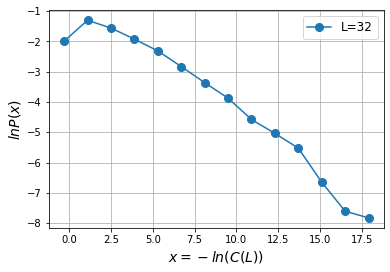

In [ ]:
## Distribution of End to end correlations 
#### plot Zlin's OBC data 

myfile = '/home/liusf/tSDRG_Results/spin_1_random_chian/Distribution_end_to_end_correlation/raw_data/OBC/Jdis10/L32_P10_m30_sum10000_corr2.csv'
df = pd.read_csv(myfile)
df['corr'] = -df['corr'].abs().apply(np.log)

N = 10000
left = -1
right = 0.4
n = 1.4
df2 = pd.DataFrame(columns = ['mid', 'lnP'])

for i in range(14):
    #print((left+right)/2)
    mid = (left+right)/2 
    selected = df[df['corr'].between(left,right)]['corr']
    left += n
    right += n
    #print(len(selected)/10000)
    lnP = math.log(len(selected)/N)
    mean = {'mid':mid ,'lnP':lnP}  
    df2.loc[i] = mean

plt.plot(df2['mid'], df2['lnP'], 'o-', markersize = 8, label = 'L=32')
plt.xlabel(r'$x = -ln(C(L))$', fontsize=14)
plt.ylabel(r'$lnP(x)$', fontsize=14)
plt.legend(loc = 'best', fontsize=12)
plt.grid()
plt.show()

## D. Distribution of Jlist

In [ ]:
## Distribution of Jlist ##
## plot ##

L = 10000
Jdis = 'J1'
Dimer = ['D0', 'D1', 'D2', 'D3', 'D4', 'D5']
for i in range(len(Dimer)):
    myfile = '/home/liusf/test/spin1/Distribution_Jdis/'+ Jdis + Dimer[i] +'_list.csv'
    df = pd.read_csv(myfile)
    up = 0
    down = 0.05
    n = 0.05
    df1 = pd.DataFrame(columns = ['mid', 'Prob'])
    df2 = pd.DataFrame(columns = ['mid', 'Prob'])
    """
    plt.plot(np.array(df['J2']), 'o', markersize = 8)
    print(np.array(df['J2']))
    """
    for j in range(40):
        #selected1 = df[df['J'].between(up,down)]['J']
        selected2 = df[df['J2'].between(up,down)]['J2']
        mid = (up+down)/2 
        up += n
        down += n
        #Prob1 = len(selected1)/L
        Prob2 = len(selected2)/L
        #mean1 = {'mid':mid ,'Prob':Prob1}
        mean2 = {'mid':mid ,'Prob':Prob2}
        #df1.loc[j] = mean1
        df2.loc[j] = mean2
    plt.plot(df1['mid'], df1['Prob'], 'o-', markersize = 8)
    plt.plot(df2['mid'], df2['Prob'], 'o-', markersize = 8, label = 'Dimer = %s' %(Dimer[i]))
#df['J2'].hist()

plt.xlabel('$J$', fontsize=14)
plt.ylabel('$P(J)$', fontsize=14)
plt.title(Jdis + 'D1toD5_power-law_distribution', fontsize=12)
#plt.xlim(0,1)
#plt.ylim(0,0.1)
plt.legend(loc = 'best', fontsize=12)
plt.grid()
plt.savefig('/home/liusf/test/spin1/Distribution_Jdis/'+ Jdis + Dimer +'_power-law_distribution.pdf', format='pdf', dpi=4000)
#plt.savefig('/home/liusf/test/spin1/Distribution_Jdis/D1toD5_distribution.pdf', format='pdf', dpi=4000)
plt.show()